In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

In [2]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
from utils import train_transforms, test_transforms, visualise_transformation

In [4]:
from torchvision import datasets
train_data= datasets.CIFAR10(root= '../data', train= True, download= True, transform= train_transforms)
test_data= datasets.CIFAR10(root= '../data', train= False, download= True, transform= test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
dataloader_args= dict(shuffle= True, batch_size= 512, num_workers= 2, pin_memory= True) if torch.cuda.is_available() else dict(shuffle= True, batch_size= 64)
train_loader= torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader= torch.utils.data.DataLoader(test_data, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


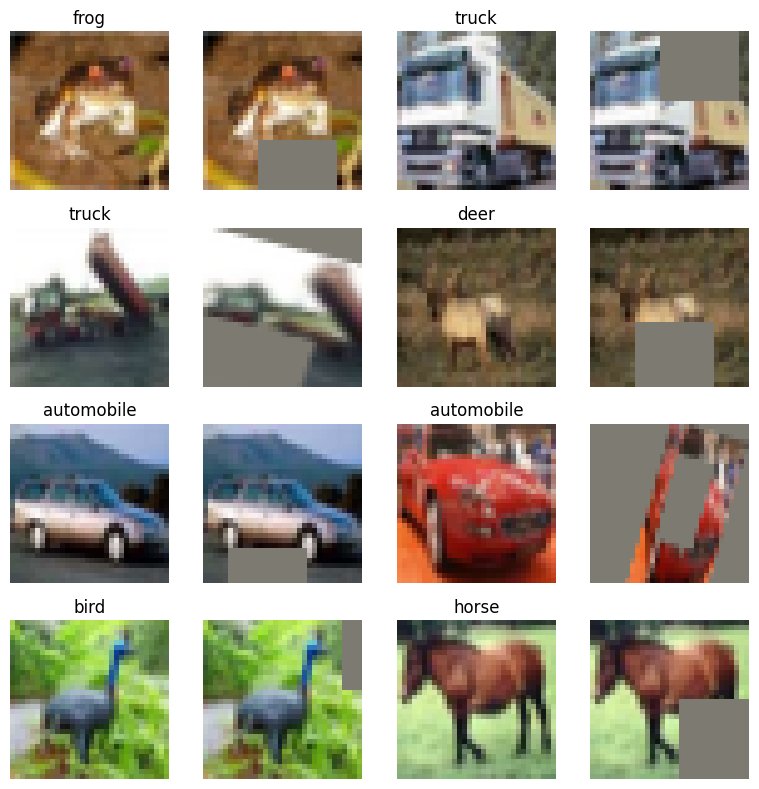

In [6]:
visualise_transformation()

In [7]:
from model import Net
model= Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
              ReLU-5          [-1, 128, 32, 32]               0
       BatchNorm2d-6          [-1, 128, 32, 32]             256
         MaxPool2d-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
              ReLU-9          [-1, 128, 16, 16]               0
      BatchNorm2d-10          [-1, 128, 16, 16]             256
           Conv2d-11          [-1, 128, 16, 16]         147,456
             ReLU-12          [-1, 128, 16, 16]               0
      BatchNorm2d-13          [-1, 128, 16, 16]             256
           Conv2d-14          [-1, 256,

/content/model.py:55: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [8]:
from train_test import train, test

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.34E-05


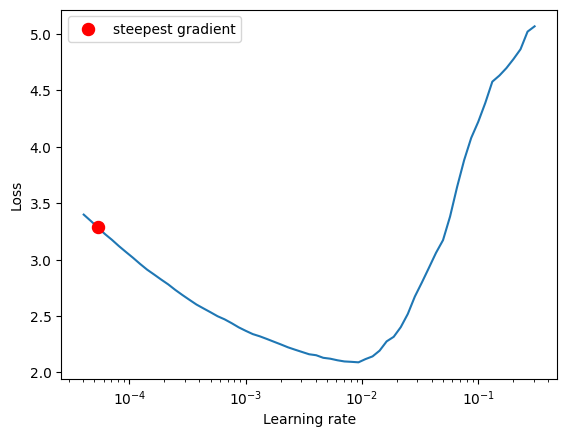

In [10]:
from torch_lr_finder import LRFinder

optimizer = optim.Adam(model.parameters(), lr=0.00001)
lr_finder = LRFinder(model, optimizer, criterion=nn.CrossEntropyLoss(), device='cuda')

lr_finder.range_test(train_loader, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

In [11]:
from torch.optim.lr_scheduler import OneCycleLR

epochs = 24
optimizer = optim.Adam(model.parameters(), lr=5.34E-05)
# Initialize the OneCycleLR scheduler
scheduler = OneCycleLR(optimizer, max_lr=5.34E-04, epochs=epochs, steps_per_epoch=len(train_loader),pct_start=0.2)

learning_rate=[]
train_accuracy=[]
test_accuracy=[]
train_losses=[]
test_losses=[]

for epoch in range(1, epochs + 1):
    print("EPOCH:", epoch)

    print('Learning rate:', optimizer.param_groups[0]['lr'],'\n')
    learning_rate.append(optimizer.param_groups[0]['lr'])

    train_acc,train_loss= train(model, device, train_loader, optimizer,scheduler)
    test_acc,test_loss= test(model, device, test_loader)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss.cpu())

EPOCH: 1
Learning rate: 2.136e-05 



Loss=1.5756280422210693 Accuracy=35.76: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



Test set: Average loss: 0.0027, Accuracy: 5285/10000 (52.85%)

EPOCH: 2
Learning rate: 7.454543749688727e-05 



Loss=1.3374172449111938 Accuracy=50.34: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]



Test set: Average loss: 0.0024, Accuracy: 5716/10000 (57.16%)

EPOCH: 3
Learning rate: 0.000212030192857904 



Loss=1.2728393077850342 Accuracy=56.14: 100%|██████████| 98/98 [00:26<00:00,  3.70it/s]



Test set: Average loss: 0.0019, Accuracy: 6680/10000 (66.80%)

EPOCH: 4
Learning rate: 0.00037675912514181906 



Loss=1.1830518245697021 Accuracy=62.04: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



Test set: Average loss: 0.0018, Accuracy: 6973/10000 (69.73%)

EPOCH: 5
Learning rate: 0.0005003709645927403 



Loss=1.0365824699401855 Accuracy=66.49: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]



Test set: Average loss: 0.0014, Accuracy: 7518/10000 (75.18%)

EPOCH: 6
Learning rate: 0.0005338420875790498 



Loss=0.900404155254364 Accuracy=70.75: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



Test set: Average loss: 0.0013, Accuracy: 7842/10000 (78.42%)

EPOCH: 7
Learning rate: 0.0005287823557554768 



Loss=0.7664255499839783 Accuracy=73.98: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]



Test set: Average loss: 0.0012, Accuracy: 8005/10000 (80.05%)

EPOCH: 8
Learning rate: 0.0005167295724780186 



Loss=0.6700454950332642 Accuracy=76.08: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]



Test set: Average loss: 0.0011, Accuracy: 8072/10000 (80.72%)

EPOCH: 9
Learning rate: 0.0004980057077940551 



Loss=0.7131329774856567 Accuracy=78.12: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



Test set: Average loss: 0.0011, Accuracy: 8197/10000 (81.97%)

EPOCH: 10
Learning rate: 0.00047311093858892864 



Loss=0.4886753559112549 Accuracy=80.29: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]



Test set: Average loss: 0.0011, Accuracy: 8291/10000 (82.91%)

EPOCH: 11
Learning rate: 0.00044271028719283263 



Loss=0.5423459410667419 Accuracy=82.12: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]



Test set: Average loss: 0.0010, Accuracy: 8407/10000 (84.07%)

EPOCH: 12
Learning rate: 0.00040761585641596886 



Loss=0.5711613297462463 Accuracy=83.46: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



Test set: Average loss: 0.0010, Accuracy: 8419/10000 (84.19%)

EPOCH: 13
Learning rate: 0.0003687651355734508 



Loss=0.4359187185764313 Accuracy=84.55: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]



Test set: Average loss: 0.0010, Accuracy: 8434/10000 (84.34%)

EPOCH: 14
Learning rate: 0.0003271959570183918 



Loss=0.4549591839313507 Accuracy=85.09: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]



Test set: Average loss: 0.0009, Accuracy: 8524/10000 (85.24%)

EPOCH: 15
Learning rate: 0.00028401877217772034 



Loss=0.4550372064113617 Accuracy=86.45: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



Test set: Average loss: 0.0009, Accuracy: 8642/10000 (86.42%)

EPOCH: 16
Learning rate: 0.0002403869876902897 



Loss=0.3019026219844818 Accuracy=87.29: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]



Test set: Average loss: 0.0009, Accuracy: 8649/10000 (86.49%)

EPOCH: 17
Learning rate: 0.00019746615406798538 



Loss=0.37119755148887634 Accuracy=87.78: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



Test set: Average loss: 0.0008, Accuracy: 8657/10000 (86.57%)

EPOCH: 18
Learning rate: 0.00015640282995347399 



Loss=0.2763245701789856 Accuracy=88.50: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]



Test set: Average loss: 0.0008, Accuracy: 8674/10000 (86.74%)

EPOCH: 19
Learning rate: 0.00011829395371413238 



Loss=0.3077857494354248 Accuracy=89.22: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



Test set: Average loss: 0.0008, Accuracy: 8673/10000 (86.73%)

EPOCH: 20
Learning rate: 8.41575405590554e-05 



Loss=0.3534436523914337 Accuracy=89.14: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]



Test set: Average loss: 0.0008, Accuracy: 8725/10000 (87.25%)

EPOCH: 21
Learning rate: 5.4905487956894505e-05 



Loss=0.3383878469467163 Accuracy=89.77: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]



Test set: Average loss: 0.0008, Accuracy: 8741/10000 (87.41%)

EPOCH: 22
Learning rate: 3.131921581253498e-05 



Loss=0.28625816106796265 Accuracy=89.85: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



Test set: Average loss: 0.0008, Accuracy: 8744/10000 (87.44%)

EPOCH: 23
Learning rate: 1.4028792134752615e-05 



Loss=0.2543869912624359 Accuracy=90.04: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]



Test set: Average loss: 0.0008, Accuracy: 8750/10000 (87.50%)

EPOCH: 24
Learning rate: 3.4961018178993216e-06 



Loss=0.26330405473709106 Accuracy=90.21: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



Test set: Average loss: 0.0008, Accuracy: 8756/10000 (87.56%)



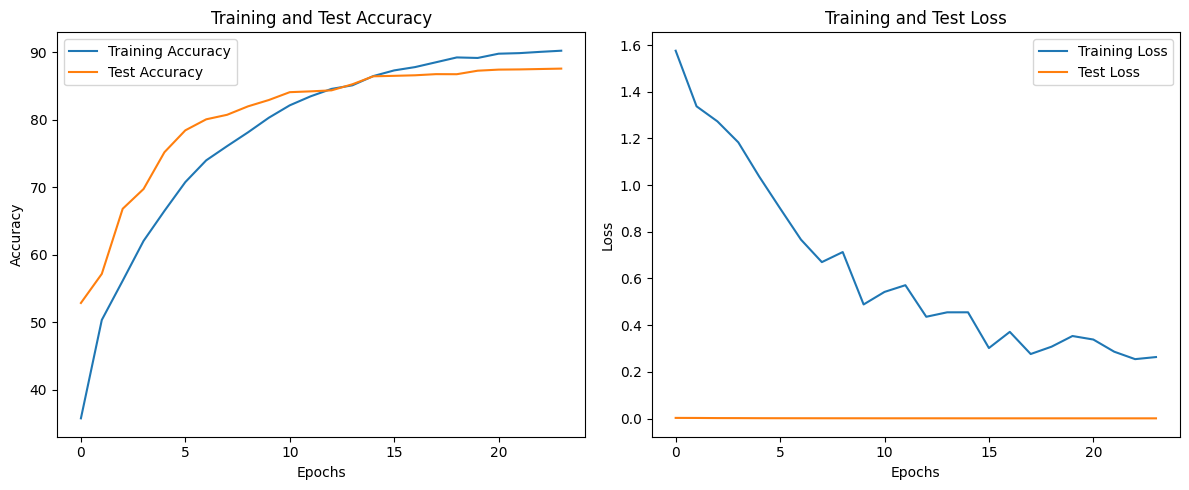

In [12]:
import matplotlib.pyplot as plt


epochs = range(len(train_accuracy))

# Create a new figure
plt.figure(figsize=(12, 5))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Create a subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the figure
plt.tight_layout()
plt.show()

Text(0, 0.5, 'learning rate')

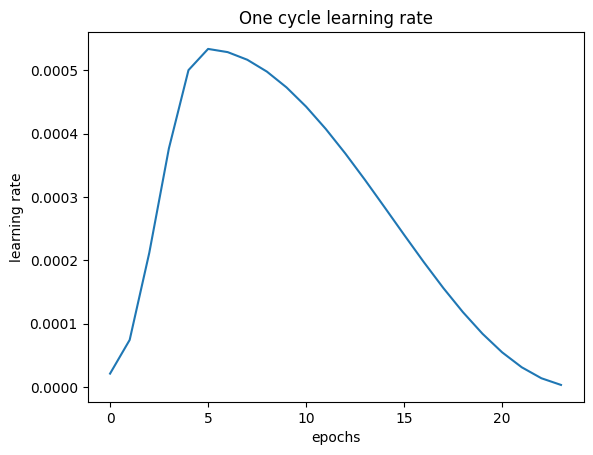

In [13]:
plt.plot(epochs, learning_rate)
plt.title('One cycle learning rate')
plt.xlabel('epochs')
plt.ylabel('learning rate')

In [ ]:

torch.save(model.state_dict(), 'final_model.pth')

Net(
  (PrepLayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (R1_c1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (R1_c2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock2): S

In [ ]:
model = Net()

model.load_state_dict(torch.load('final_model.pth',map_location=torch.device('cpu')))

model.eval()

Net(
  (PrepLayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (R1_c1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (R1_c2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock2): S

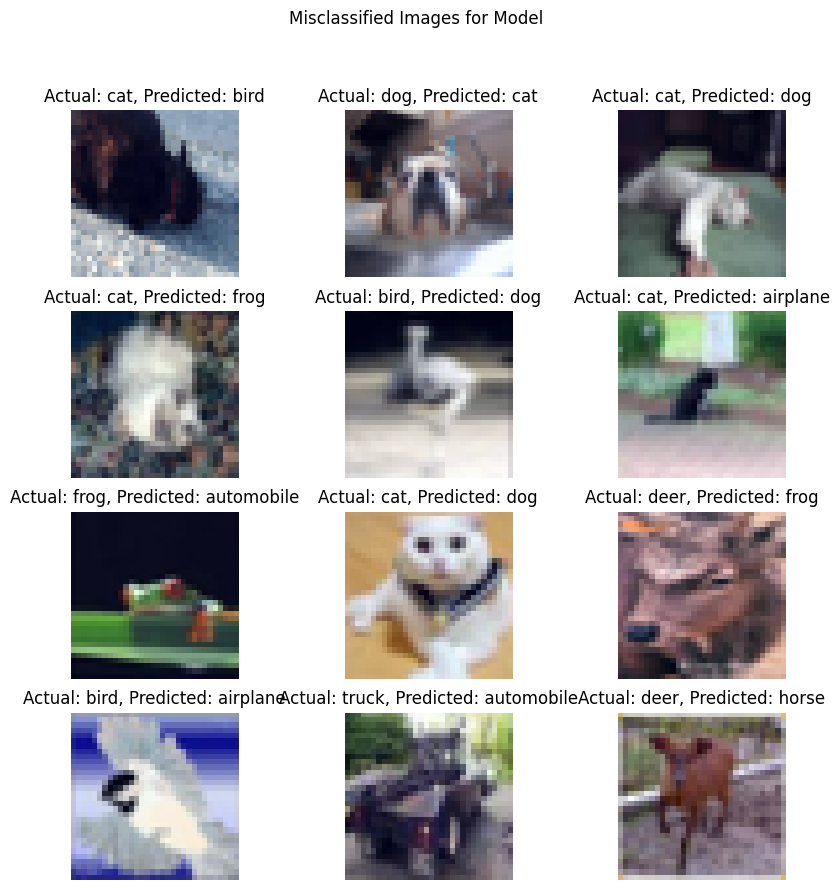

In [ ]:
from utils import test_and_find_misclassified, display_misclassified_images
misclassified_images, misclassified_labels, misclassified_preds = test_and_find_misclassified(model, test_loader,torch.device('cpu'))
display_misclassified_images(misclassified_images[:12], misclassified_labels[:12], misclassified_preds[:12], 'Misclassified Images for Model')